In [ ]:
#imported all the needed libraries
import pandas as pd
import os
from glob import glob
import glob as glb
import numpy as np

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess


#Lemmatization and Part of Speech(POS)
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

#Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')


#Stemming
from nltk.stem import PorterStemmer

import nltk


import string
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Scopus1 = pd.read_csv("/content/scopus.csv")

In [ ]:
Scopus2 = pd.read_csv("/content/scopus1.csv")

In [ ]:
Scopus3 = pd.read_csv("/content/scopus2.csv")

In [ ]:
Scopus4 = pd.read_csv("/content/scopus3.csv")

In [ ]:
#Using Glob to arrange them together
data = sorted(glob('/content/scopus*.csv'))
data

['/content/scopus.csv',
 '/content/scopus1.csv',
 '/content/scopus2.csv',
 '/content/scopus3.csv']

In [ ]:
mergeddataset = pd.concat(pd.read_csv(mydataset).assign(Sourcedataname = mydataset)
                          for mydataset in data)

In [ ]:
#Display the merged dataset
mergeddataset

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID,Sourcedataname
0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,103,1,NaN,100006,NaN,...,"Falahkheirkhah, K., Department of Chemical and...",A pathologist's optical microscopic examinatio...,computer vision; deep learning; deepfake patho...,coloring agent; biopsy; diagnostic imaging; hu...,Article,Final,NaN,Scopus,2-s2.0-85147460992,/content/scopus.csv
1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,37,NaN,101161,NaN,NaN,...,"Isaksson, L.J., Division of Radiation Oncology...",When researchers are faced with building machi...,Deep learning; Gradient boost; Prostate cancer...,adult; area under the curve; Article; cancer d...,Article,Final,NaN,Scopus,2-s2.0-85146480471,/content/scopus.csv
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,49,11,NaN,7001,7015,...,"Liu, Y., School of Information Science and Tec...",Purpose: The accurate and reliable segmentatio...,computer aided diagnosis; multi-scale discrimi...,Channel coding; Computer aided diagnosis; Conv...,Article,Final,NaN,Scopus,2-s2.0-85143644976,/content/scopus.csv
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,82,NaN,102612,NaN,NaN,...,"Song, X., Department of Biomedical Engineering...","In the past few years, convolutional neural ne...",Cross-modal attention; Deep learning; Multi-mo...,Convolutional neural networks; Deep neural net...,Article,Final,NaN,Scopus,2-s2.0-85138030059,/content/scopus.csv
4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,26,11,NaN,5298,5309,...,"Zhang, G., University of Shanghai for Science ...",The automatic and accurate segmentation of the...,cross-modal self-attention distillation; multi...,Computer vision; Diseases; Distillation; Image...,Article,Final,NaN,Scopus,2-s2.0-85119436895,/content/scopus.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,Fritsche H.A.,57210989328;,Tumor markers and pattern recognition analysis...,2002,Journal of Clinical Ligand Assay,25,1,NaN,11,15,...,"Fritsche, H.A., Univ. TX M. D. Anderson Cancer...",Pattern recognition analysis refers to the use...,Breast cancer; Neural network; Pattern recogni...,tumor marker; algorithm; artificial neural net...,Conference Paper,Final,NaN,Scopus,2-s2.0-0036520144,/content/scopus3.csv
1608,"Ho S.-M., Lau K.-M.",7403713823;34868334900;,DNA microarrays in prostate cancer,2002,Current Urology Reports,3,1,NaN,53,60,...,"Ho, S.-M., Department of Surgery, University o...",DNA microarray technology provides a means to ...,Benign Prostatic Hyperplasia; cDNA Microarray;...,algorithm; artificial neural network; DNA micr...,Article,Final,NaN,Scopus,2-s2.0-0036483670,/content/scopus3.csv
1609,"Su A.I., Schultz P.G., Welsh J.B., Sapinoso L....",7005096701;57219105974;57204151090;6602443640;...,Molecular classification of human carcinomas b...,2001,Cancer Research,61,20,NaN,7388,7393,...,"Su, A.I., Department of Chemistry, The Scripps...",Classification of human tumors according to th...,NaN,article; breast cancer; cancer classification;...,Article,Final,NaN,Scopus,2-s2.0-0035887459,/content/scopus3.csv
1610,"Zupan B., Demšar J.

In [ ]:
#Saving all the scopus as 1 .csv in dataset Folder
mergeddataset.to_csv("/content/mergedscopus.csv")

In [ ]:
#Importing and reading the newly merged dataset
Scopusdataset = pd.read_csv("/content/mergedscopus.csv") 
Scopusdataset.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID,Sourcedataname
0,0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,103,1,NaN,100006,...,"Falahkheirkhah, K., Department of Chemical and...",A pathologist's optical microscopic examinatio...,computer vision; deep learning; deepfake patho...,coloring agent; biopsy; diagnostic imaging; hu...,Article,Final,NaN,Scopus,2-s2.0-85147460992,/content/scopus.csv
1,1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,37,NaN,101161,NaN,...,"Isaksson, L.J., Division of Radiation Oncology...",When researchers are faced with building machi...,Deep learning; Gradient boost; Prostate cancer...,adult; area under the curve; Article; cancer d...,Article,Final,NaN,Scopus,2-s2.0-85146480471,/content/scopus.csv
2,2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,49,11,NaN,7001,...,"Liu, Y., School of Information Science and Tec...",Purpose: The accurate and reliable segmentatio...,computer aided diagnosis; multi-scale discrimi...,Channel coding; Computer aided diagnosis; Conv...,Article,Final,NaN,Scopus,2-s2.0-85143644976,/content/scopus.csv
3,3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,82,NaN,102612,NaN,...,"Song, X., Department of Biomedical Engineering...","In the past few years, convolutional neural ne...",Cross-modal attention; Deep learning; Multi-mo...,Convolutional neural networks; Deep neural net...,Article,Final,NaN,Scopus,2-s2.0-85138030059,/content/scopus.csv
4,4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,26,11,NaN,5298,...,"Zhang, G., University of Shanghai for Science ...",The automatic and accurate segmentation of the...,cross-modal self-attention distillation; multi...,Computer vision; Diseases; Distillation; Image...,Article,Final,NaN,Scopus,2-s2.0-85119436895,/content/scopus.csv


In [ ]:
Scopusdataset.tail()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID,Sourcedataname
3912,1607,Fritsche H.A.,57210989328;,Tumor markers and pattern recognition analysis...,2002,Journal of Clinical Ligand Assay,25,1,NaN,11,...,"Fritsche, H.A., Univ. TX M. D. Anderson Cancer...",Pattern recognition analysis refers to the use...,Breast cancer; Neural network; Pattern recogni...,tumor marker; algorithm; artificial neural net...,Conference Paper,Final,NaN,Scopus,2-s2.0-0036520144,/content/scopus3.csv
3913,1608,"Ho S.-M., Lau K.-M.",7403713823;34868334900;,DNA microarrays in prostate cancer,2002,Current Urology Reports,3,1,NaN,53,...,"Ho, S.-M., Department of Surgery, University o...",DNA microarray technology provides a means to ...,Benign Prostatic Hyperplasia; cDNA Microarray;...,algorithm; artificial neural network; DNA micr...,Article,Final,NaN,Scopus,2-s2.0-0036483670,/content/scopus3.csv
3914,1609,"Su A.I., Schultz P.G., Welsh J.B., Sapinoso L....",7005096701;57219105974;57204151090;6602443640;...,Molecular classification of human carcinomas b...,2001,Cancer Research,61,20,NaN,7388,...,"Su, A.I., Department of Chemistry, The Scripps...",Classification of human tumors according to th...,NaN,article; breast cancer; cancer classification;...,Article,Final,NaN,Scopus,2-s2.0-0035887459,/content/scopus3.csv
3915,1610,"Zupan B., Demšar J., Kattan M.W., Beck J.R., B...",7003934784;55075851300;7102396973;7403532482;7...,Machine learning for survival analysis: A case...,2000,Artificial Intelligence in Medicine,20,1,NaN,59,...,"Zupan, B., Fac. of Comp. and Info. Science, Un...",Machine learning techniques have recently rece...,Censored data; Data weighting; Machine learnin...,Data structures; Hospital data processing; Lea...,Article,Final,NaN,Scopus,2-s2.0-0343081009,/content/scopus3.csv
3916,1611,"Zupan B., Demšar J., Kattan M.W., Beck J.R., B...",7003934784;55075851300;7102396973;7403531958;7...,Machine learning for survival analysis: A case...,1999,Lecture Notes in Computer Science (including s...,1620,NaN,NaN,346,...,"Zupan, B., University of Ljubljana, Slovenia, ...",This paper deals with the problem of learning ...,NaN,Decision making; Machine learning; Urology; A-...,Conference Paper,Final,NaN,Scopus,2-s2.0-84855619327,/content/scopus3.csv


In [ ]:
Scopusdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3917 non-null   int64  
 1   Authors                    3917 non-null   object 
 2   Author(s) ID               3917 non-null   object 
 3   Title                      3917 non-null   object 
 4   Year                       3917 non-null   int64  
 5   Source title               3917 non-null   object 
 6   Volume                     3592 non-null   object 
 7   Issue                      2397 non-null   object 
 8   Art. No.                   1596 non-null   object 
 9   Page start                 2354 non-null   object 
 10  Page end                   2292 non-null   object 
 11  Page count                 60 non-null     float64
 12  Cited by                   2969 non-null   float64
 13  DOI                        3758 non-null   objec

In [ ]:
print(Scopusdataset.shape)

(3917, 26)


In [ ]:
#Checking for any empty cells
Scopusdataset.isnull().sum()

Unnamed: 0                      0
Authors                         0
Author(s) ID                    0
Title                           0
Year                            0
Source title                    0
Volume                        325
Issue                        1520
Art. No.                     2321
Page start                   1563
Page end                     1625
Page count                   3857
Cited by                      948
DOI                           159
Link                            0
Affiliations                  122
Authors with affiliations      90
Abstract                        0
Author Keywords               979
Index Keywords                333
Document Type                   0
Publication Stage               0
Open Access                  3917
Source                          0
EID                             0
Sourcedataname                  0
dtype: int64

In [ ]:
#Dropping all the columns with null values
Scopusdataset = Scopusdataset.dropna(how = 'any', axis=1)
Scopusdataset.shape

(3917, 13)

In [ ]:
#Filtering abstracts without computer vision techniques (CVT)
Scopusdataset['Abstract_with_CVT'] = Scopusdataset['Abstract'].str.contains('computer vision', case=True)

Scopusdataset.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID,Sourcedataname,Abstract_with_CVT
0,0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,https://www.scopus.com/inward/record.uri?eid=2...,A pathologist's optical microscopic examinatio...,Article,Final,Scopus,2-s2.0-85147460992,/content/scopus.csv,False
1,1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,https://www.scopus.com/inward/record.uri?eid=2...,When researchers are faced with building machi...,Article,Final,Scopus,2-s2.0-85146480471,/content/scopus.csv,False
2,2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The accurate and reliable segmentatio...,Article,Final,Scopus,2-s2.0-85143644976,/content/scopus.csv,False
3,3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059,/content/scopus.csv,True
4,4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,https://www.scopus.com/inward/record.uri?eid=2...,The automatic and accurate segmentation of the...,Article,Final,Scopus,2-s2.0-85119436895,/content/scopus.csv,False


In [ ]:
Abs_CV =  Scopusdataset.drop(Scopusdataset[Scopusdataset.Abstract_with_CVT!=True].index)

In [ ]:
Abs_CV.shape

(87, 14)

In [ ]:
#Filtering abstracts with only image
Scopusdataset['Abstract_with_image'] = Scopusdataset['Abstract'].str.contains('image', case=True)

Scopusdataset.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID,Sourcedataname,Abstract_with_CVT,Abstract_with_image
0,0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,https://www.scopus.com/inward/record.uri?eid=2...,A pathologist's optical microscopic examinatio...,Article,Final,Scopus,2-s2.0-85147460992,/content/scopus.csv,False,True
1,1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,https://www.scopus.com/inward/record.uri?eid=2...,When researchers are faced with building machi...,Article,Final,Scopus,2-s2.0-85146480471,/content/scopus.csv,False,False
2,2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The accurate and reliable segmentatio...,Article,Final,Scopus,2-s2.0-85143644976,/content/scopus.csv,False,True
3,3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059,/content/scopus.csv,True,True
4,4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,https://www.scopus.com/inward/record.uri?eid=2...,The automatic and accurate segmentation of the...,Article,Final,Scopus,2-s2.0-85119436895,/content/scopus.csv,False,True


In [ ]:
Ab_Image =  Scopusdataset.drop(Scopusdataset[Scopusdataset.Abstract_with_image!=True].index)

In [ ]:
Ab_Image.shape

(1542, 15)

In [ ]:
#Filtering abstracts with only Learning
Scopusdataset['Abstract_with_learning'] = Scopusdataset['Abstract'].str.contains('learning', case=True)

Scopusdataset.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID,Sourcedataname,Abstract_with_CVT,Abstract_with_image,Abstract_with_learning
0,0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,https://www.scopus.com/inward/record.uri?eid=2...,A pathologist's optical microscopic examinatio...,Article,Final,Scopus,2-s2.0-85147460992,/content/scopus.csv,False,True,True
1,1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,https://www.scopus.com/inward/record.uri?eid=2...,When researchers are faced with building machi...,Article,Final,Scopus,2-s2.0-85146480471,/content/scopus.csv,False,False,True
2,2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The accurate and reliable segmentatio...,Article,Final,Scopus,2-s2.0-85143644976,/content/scopus.csv,False,True,False
3,3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059,/content/scopus.csv,True,True,True
4,4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,https://www.scopus.com/inward/record.uri?eid=2...,The automatic and accurate segmentation of the...,Article,Final,Scopus,2-s2.0-85119436895,/content/scopus.csv,False,True,True


In [ ]:
Ab_Learning =  Scopusdataset.drop(Scopusdataset[Scopusdataset.Abstract_with_learning!=True].index)

In [ ]:
Ab_Learning.shape

(2288, 16)

In [ ]:
#Filtering abstracts with only Algorithm
Scopusdataset['Abstract_with_Algorithm'] = Scopusdataset['Abstract'].str.contains('algorithm', case=True)

Scopusdataset.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID,Sourcedataname,Abstract_with_CVT,Abstract_with_image,Abstract_with_learning,Abstract_with_Algorithm
0,0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,https://www.scopus.com/inward/record.uri?eid=2...,A pathologist's optical microscopic examinatio...,Article,Final,Scopus,2-s2.0-85147460992,/content/scopus.csv,False,True,True,False
1,1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,https://www.scopus.com/inward/record.uri?eid=2...,When researchers are faced with building machi...,Article,Final,Scopus,2-s2.0-85146480471,/content/scopus.csv,False,False,True,False
2,2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The accurate and reliable segmentatio...,Article,Final,Scopus,2-s2.0-85143644976,/content/scopus.csv,False,True,False,False
3,3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059,/content/scopus.csv,True,True,True,False
4,4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,https://www.scopus.com/inward/record.uri?eid=2...,The automatic and accurate segmentation of the...,Article,Final,Scopus,2-s2.0-85119436895,/content/scopus.csv,False,True,True,False


In [ ]:
Abs_Algorithm =  Scopusdataset.drop(Scopusdataset[Scopusdataset.Abstract_with_Algorithm!=True].index)

In [ ]:
Abs_Algorithm.shape

(1056, 17)

In [ ]:
#Filtering abstracts with only Computer Vision Tech and Algorithm
Scopusdataset['Abstract_with_CV&A'] = Scopusdataset['Abstract'].str.contains('computer vision|algorithm', case=True)

Scopusdataset.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID,Sourcedataname,Abstract_with_CVT,Abstract_with_image,Abstract_with_learning,Abstract_with_Algorithm
0,0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,https://www.scopus.com/inward/record.uri?eid=2...,A pathologist's optical microscopic examinatio...,Article,Final,Scopus,2-s2.0-85147460992,/content/scopus.csv,False,True,True,False
1,1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,https://www.scopus.com/inward/record.uri?eid=2...,When researchers are faced with building machi...,Article,Final,Scopus,2-s2.0-85146480471,/content/scopus.csv,False,False,True,False
2,2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The accurate and reliable segmentatio...,Article,Final,Scopus,2-s2.0-85143644976,/content/scopus.csv,False,True,False,False
3,3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059,/content/scopus.csv,True,True,True,False
4,4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,https://www.scopus.com/inward/record.uri?eid=2...,The automatic and accurate segmentation of the...,Article,Final,Scopus,2-s2.0-85119436895,/content/scopus.csv,False,True,True,False


In [ ]:
#Save the abstracts with the 2 conditions(Computer Vision and Algorithm) in a new DF called New Abstract
New_Abstract =  Scopusdataset.drop(Scopusdataset[Scopusdataset.Abstract_with_CVT!=True].index)

In [ ]:
New_Abstract.shape

(1117, 17)

In [ ]:
New_Abstract.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID,Sourcedataname,Abstract_with_CVT,Abstract_with_image,Abstract_with_learning,Abstract_with_Algorithm
3,3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059,/content/scopus.csv,True,True,True,False
10,10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: Developing an artificial intelligence...,Article,Final,Scopus,2-s2.0-85129162505,/content/scopus.csv,True,True,False,True
12,12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,https://www.scopus.com/inward/record.uri?eid=2...,Motivation: Molecular phenotyping by gene expr...,Article,Final,Scopus,2-s2.0-85133879172,/content/scopus.csv,True,True,False,False
19,19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,https://www.scopus.com/inward/record.uri?eid=2...,The proceedings contain 40 papers. The topics ...,Conference Review,Final,Scopus,2-s2.0-85134570310,/content/scopus.csv,True,True,False,False
20,20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: Prostate biopsy histopathology and im...,Article,Final,Scopus,2-s2.0-85128695348,/content/scopus.csv,True,True,True,True


In [ ]:
#Retaining the needed column headings
New_Abstract = New_Abstract[['Authors','Author(s) ID', 'Title', 'Year', 'Source title', 'Abstract']]

In [ ]:
#Changing to lower case
New_Abstract['Abstract_on_Lowercase'] = New_Abstract['Abstract'].str.lower()
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne..."
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...


In [ ]:
#Removal of punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Create a function
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [ ]:
New_Abstract['Abstract_without_Punct'] = New_Abstract['Abstract_on_Lowercase'].apply(lambda x: remove_punctuations(x))
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...


In [ ]:
New_Abstract['Tokenized_Abstract'] = New_Abstract['Abstract_without_Punct'].apply(lambda x: word_tokenize(x))
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct,Tokenized_Abstract
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...,"[in, the, past, few, years, convolutional, neu..."
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...,"[purpose, developing, an, artificial, intellig..."
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...,"[motivation, molecular, phenotyping, by, gene,..."
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...,"[the, proceedings, contain, 40, papers, the, t..."
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...,"[purpose, prostate, biopsy, histopathology, an..."


In [ ]:
default_stopwords = stopwords.words('english')

In [ ]:
#Removal of stopwords
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
custom_stopwords = ['papers', 'paper', 'study', 'studied', 'studying', 'use', 'using', 'used', 'research', 
                    'purpose', 'train' 'dataset', 'datasets', 'learn', 'learned', 'learning', 'learnt', 
                    'data', 'test', 'method', 'propose', 'proposed', 'proposing', 'approach', 'patient',
                    'cancer', 'feature', 'features', 'suggest', '±','©', 'training','ten', 'insight', 
                    'help','set', 'showing', 'show', 'case', 'cnns', 'cnn', 'also', 
                    'image', 'images', 'error', 'errors', 'size', 'also', 'base', 'help', 'bring',
                   'improve', 'work', 'across', 'available', 'follow','learn', 'learning',
                   'planned', 'planning', 'plan', 'identify', 'review','high']
stopwords.extend(custom_stopwords)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
words = New_Abstract['Tokenized_Abstract']
filtered_words = []

for word in words:
    if word not in custom_stopwords and word not in stopwords:
        filtered_words.append(word)
        


In [ ]:
def remove_stopwords(text_list, custom_stopwords):
    return [word for word in text_list if word not in custom_stopwords]

In [ ]:
New_Abstract['Abstract_without_Stopwords'] = New_Abstract['Tokenized_Abstract'].apply(lambda x: remove_stopwords(x, stopwords))
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct,Tokenized_Abstract,Abstract_without_Stopwords
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...,"[in, the, past, few, years, convolutional, neu...","[past, years, convolutional, neural, networks,..."
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...,"[purpose, developing, an, artificial, intellig...","[developing, artificial, intelligencebased, pr..."
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...,"[motivation, molecular, phenotyping, by, gene,...","[motivation, molecular, phenotyping, gene, exp..."
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...,"[the, proceedings, contain, 40, papers, the, t...","[proceedings, contain, 40, topics, discussed, ..."
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...,"[purpose, prostate, biopsy, histopathology, an...","[prostate, biopsy, histopathology, immunohisto..."


In [ ]:
#Stemming
PS = PorterStemmer()
word_list = New_Abstract['Abstract_without_Stopwords']
def stem_words(word_list):
    return " ".join([PS.stem(word) for word in word_list])

In [ ]:
New_Abstract['Stemmed_Abstract'] = New_Abstract['Abstract_without_Stopwords'].apply(lambda x: stem_words(x))
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct,Tokenized_Abstract,Abstract_without_Stopwords,Stemmed_Abstract
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...,"[in, the, past, few, years, convolutional, neu...","[past, years, convolutional, neural, networks,...",past year convolut neural network proven power...
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...,"[purpose, developing, an, artificial, intellig...","[developing, artificial, intelligencebased, pr...",develop artifici intelligencebas prostat detec...
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...,"[motivation, molecular, phenotyping, by, gene,...","[motivation, molecular, phenotyping, gene, exp...",motiv molecular phenotyp gene express profil c...
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...,"[the, proceedings, contain, 40, papers, the, t...","[proceedings, contain, 40, topics, discussed, ...",proceed contain 40 topic discuss includ perfor...
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...,"[purpose, prostate, biopsy, histopathology, an...","[prostate, biopsy, histopathology, immunohisto...",prostat biopsi histopatholog immunohistochemis...


In [ ]:
#Lemmatization and Part of Speech (POS)Tagging
# Create a dictionary
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB,"j": wordnet.ADJ, "R": wordnet.ADV}

In [ ]:
#Create a function
def lemmatize_words(text_list):
    # find pos tags
    pos_text = pos_tag(text_list)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [ ]:
wordnet.NOUN

'n'

In [ ]:
New_Abstract['Lemmatized_Abstract'] = New_Abstract['Abstract_without_Stopwords'].apply(lambda x: lemmatize_words(x))
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct,Tokenized_Abstract,Abstract_without_Stopwords,Stemmed_Abstract,Lemmatized_Abstract
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...,"[in, the, past, few, years, convolutional, neu...","[past, years, convolutional, neural, networks,...",past year convolut neural network proven power...,past year convolutional neural network proven ...
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...,"[purpose, developing, an, artificial, intellig...","[developing, artificial, intelligencebased, pr...",develop artifici intelligencebas prostat detec...,develop artificial intelligencebased prostate ...
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...,"[motivation, molecular, phenotyping, by, gene,...","[motivation, molecular, phenotyping, gene, exp...",motiv molecular phenotyp gene express profil c...,motivation molecular phenotyping gene expressi...
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...,"[the, proceedings, contain, 40, papers, the, t...","[proceedings, contain, 40, topics, discussed, ...",proceed contain 40 topic discuss includ perfor...,proceeding contain 40 topic discussed include ...
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...,"[purpose, prostate, biopsy, histopathology, an...","[prostate, biopsy, histopathology, immunohisto...",prostat biopsi histopatholog immunohistochemis...,prostate biopsy histopathology immunohistochem...


In [ ]:
#Part of Exploratory Data Analysis
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
def create_word_cloud(target_df, column_name):
    print('joining all words into long text......')
    full_text = ','.join(list(target_df[column_name].values))
    wordcloud = WordCloud(background_color ='black',
                       max_words = 100,
                       contour_width =2,
                       contour_color ='yellow')
    print('Creating word cloud')
    wordcloud.generate(full_text)
    return wordcloud

joining all words into long text......
Creating word cloud


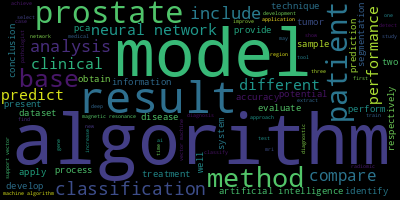

In [ ]:
wordcloud = create_word_cloud(New_Abstract, 'Lemmatized_Abstract')
wordcloud.to_image()

In [ ]:
list_of_simple_preprocess_data = []
for i in New_Abstract['Lemmatized_Abstract']:
    list_of_simple_preprocess_data.append(gensim.utils.simple_preprocess(i, deacc=True, min_len=3))

In [ ]:
Tokenized_Abstracts = list_of_simple_preprocess_data

In [ ]:
Tokenized_Abstracts

print (Tokenized_Abstracts[0][0:20])

['past', 'year', 'convolutional', 'neural', 'network', 'proven', 'powerful', 'extract', 'crucial', 'medical', 'registration', 'however', 'challenging', 'application', 'recent', 'advance', 'computer', 'vision', 'limit', 'ability']


In [ ]:
#Using phrases and phraser classes from the gensim library,bigram and trigram is generated.
bigram_phrases = gensim.models.Phrases(Tokenized_Abstracts, min_count=5, threshold=20)
trigram_phrases = gensim.models.Phrases(bigram_phrases[Tokenized_Abstracts], threshold=20)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

In [ ]:
bigram_abstracts = [bigram[doc] for doc in Tokenized_Abstracts]
trigram_abstracts = [trigram[bigram[doc]] for doc in Tokenized_Abstracts]

In [ ]:
def make_bigrams(texts):
    return(bigram[doc] for doc in texts)

def make_trigrams(texts):
    return(trigram[bigram[doc]] for doc in texts)

In [ ]:
data_bigrams = make_bigrams(Tokenized_Abstracts)
data_bigrams_trigrams = make_trigrams(data_bigrams)

data_list = list(data_bigrams_trigrams)
print(data_list[0])


['past_year', 'convolutional_neural_network', 'proven', 'powerful', 'extract', 'crucial', 'medical', 'registration', 'however', 'challenging', 'application', 'recent_advance', 'computer_vision', 'limit', 'ability', 'understand', 'spatial', 'correspondence', 'core', 'registration', 'issue', 'exaggerate', 'come', 'multimodal_registration', 'appearance', 'input', 'differ', 'significantly', 'present_novel', 'crossmodal_attention', 'mechanism', 'correlate', 'extract', 'multimodal', 'input', 'map', 'correlation', 'registration', 'transformation', 'efficiently', 'train', 'developed', 'network', 'contrastive', 'learningbased', 'pretraining', 'aid', 'network', 'extract', 'highlevel', 'input', 'modality', 'follow', 'crossmodal_attention', 'validate', 'transrectal_ultrasound_trus', 'magnetic_resonance', 'registration', 'clinically', 'important', 'procedure', 'benefit', 'prostate', 'biopsy', 'experimental_result_demonstrate', 'mrtrus', 'registration', 'deep', 'neural_network', 'embed', 'crossmodal

In [ ]:
def process_texts(data_list):
    texts =[bigram[line] for line in data_list]
    return texts

In [ ]:
import re
data_list = process_texts(list_of_simple_preprocess_data)

# LDA MODEL

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [ ]:
id2word = Dictionary(data_list)
corpus = [id2word.doc2bow(text) for text in data_list]

In [ ]:
print(id2word)

Dictionary<9921 unique tokens: ['ability', 'advance', 'aid', 'appearance', 'application']...>


In [ ]:
#To see the first 200 corpus and also the first word as rep by id2word is ability
print(corpus[0][0:200])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 3), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 5), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 6), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)]
ability


In [ ]:
#Training
ldamodel = LdaModel(corpus, num_topics=10, random_state=50, update_every=1, passes=50, alpha='auto', id2word=id2word)

In [ ]:
ldamodel.show_topics()
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.027*"gene" + 0.018*"microarray" + 0.015*"prostate" + 0.012*"algorithm" + 0.010*"classification" + 0.009*"result" + 0.009*"machine" + 0.008*"accuracy" + 0.007*"cell" + 0.006*"predict"
Topic: 1 
Words: 0.026*"model" + 0.014*"prostate" + 0.013*"patient" + 0.011*"algorithm" + 0.008*"result" + 0.007*"performance" + 0.007*"machine" + 0.007*"pca" + 0.006*"tumor" + 0.006*"clinical"
Topic: 2 
Words: 0.016*"prostate" + 0.015*"algorithm" + 0.011*"pca" + 0.009*"patient" + 0.008*"medical" + 0.008*"deep" + 0.008*"diagnosis" + 0.007*"analysis" + 0.006*"application" + 0.006*"study"
Topic: 3 
Words: 0.021*"prostate" + 0.014*"algorithm" + 0.010*"classification" + 0.010*"tissue" + 0.009*"biopsy" + 0.009*"network" + 0.008*"result" + 0.008*"system" + 0.008*"gleason_grade" + 0.008*"pathologist"
Topic: 4 
Words: 0.015*"prostate" + 0.010*"algorithm" + 0.008*"pathology" + 0.008*"machine" + 0.007*"include" + 0.006*"analysis" + 0.006*"method" + 0.006*"wsis" + 0.005*"performance" + 0.005*"tumor

**Suggested Topics for generated top words**

Topic 0: Gene expression analysis and microarray technology for prostate cancer diagnosis 
Topic 1: Machine learning algorithms for prostate cancer patient prognosis and diagnosis 
Topic 2: Application of PCA (Principal Component Analysis) and deep learning in prostate cancer medical imaging and diagnosis 
Topic 3: Prostate cancer tissue classification and grading using machine learning and pathology methods. Topic 4: Pathology and machine learning methods for analyzing prostate tumor characteristics and performance. 
Topic 5: Machine learning methods for predicting prostate cancer treatment outcomes and dosing. 
Topic 6: Segmentation and detection of prostate cancer lesions using machine learning algorithms. 
Topic 7: Deep learning and neural network models for prostate cancer diagnosis and classification 
Topic 8: Prostate cancer diagnosis and pathology using the Paige Prostate system and machine learning algorithms. 
Topic 9: Medical applications of machine learning algorithms for prostate cancer detection and diagnosis.

In [ ]:
# Map each abstract to its relevant topic
New_Abstract['Topic'] = [max(ldamodel[doc], key=lambda x: x[1])[0] for doc in corpus]

In [ ]:
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct,Tokenized_Abstract,Abstract_without_Stopwords,Stemmed_Abstract,Lemmatized_Abstract,Topic
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...,"[in, the, past, few, years, convolutional, neu...","[past, years, convolutional, neural, networks,...",past year convolut neural network proven power...,past year convolutional neural network proven ...,7
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...,"[purpose, developing, an, artificial, intellig...","[developing, artificial, intelligencebased, pr...",develop artifici intelligencebas prostat detec...,develop artificial intelligencebased prostate ...,3
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...,"[motivation, molecular, phenotyping, by, gene,...","[motivation, molecular, phenotyping, gene, exp...",motiv molecular phenotyp gene express profil c...,motivation molecular phenotyping gene expressi...,1
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...,"[the, proceedings, contain, 40, papers, the, t...","[proceedings, contain, 40, topics, discussed, ...",proceed contain 40 topic discuss includ perfor...,proceeding contain 40 topic discussed include ...,6
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...,"[purpose, prostate, biopsy, histopathology, an...","[prostate, biopsy, histopathology, immunohisto...",prostat biopsi histopatholog immunohistochemis...,prostate biopsy histopathology immunohistochem...,3


In [ ]:
Topic_Labels = {
    0: "Gene expression analysis and microarray technology for prostate cancer diagnosis",
    1: "Machine learning algorithms for prostate cancer patient prognosis and diagnosis",
    2: "Application of PCA (Principal Component Analysis) and deep learning in prostate cancer medical imaging and diagnosis",
    3: "Prostate cancer tissue classification and grading using machine learning and pathology methods",
    4: "Pathology and machine learning methods for analyzing prostate tumor characteristics and performance",
    5: "Machine learning methods for predicting prostate cancer treatment outcomes and dosing",
    6: "Segmentation and detection of prostate cancer lesions using machine learning algorithms",
    7: "Deep learning and neural network models for prostate cancer diagnosis and classification",
    8: "Prostate cancer diagnosis and pathology using the Paige Prostate system and machine learning algorithms",
    9: "Medical applications of machine learning algorithms for prostate cancer detection and diagnosis"}


New_Abstract['Topic_Labels'] = New_Abstract['Topic'].map(Topic_Labels)

In [ ]:
New_Abstract.head()

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct,Tokenized_Abstract,Abstract_without_Stopwords,Stemmed_Abstract,Lemmatized_Abstract,Topic,Topic_Labels
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...,"[in, the, past, few, years, convolutional, neu...","[past, years, convolutional, neural, networks,...",past year convolut neural network proven power...,past year convolutional neural network proven ...,7,Deep learning and neural network models for pr...
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...,"[purpose, developing, an, artificial, intellig...","[developing, artificial, intelligencebased, pr...",develop artifici intelligencebas prostat detec...,develop artificial intelligencebased prostate ...,3,Prostate cancer tissue classification and grad...
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...,"[motivation, molecular, phenotyping, by, gene,...","[motivation, molecular, phenotyping, gene, exp...",motiv molecular phenotyp gene express profil c...,motivation molecular phenotyping gene expressi...,1,Machine learning algorithms for prostate cance...
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...,"[the, proceedings, contain, 40, papers, the, t...","[proceedings, contain, 40, topics, discussed, ...",proceed contain 40 topic discuss includ perfor...,proceeding contain 40 topic discussed include ...,6,Segmentation and detection of prostate cancer ...
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...,"[purpose, prostate, biopsy, histopathology, an...","[prostate, biopsy, histopathology, immunohisto...",prostat biopsi histopatholog immunohistochemis...,prostate biopsy histopathology immunohistochem...,3,Prostate cancer tissue classification and grad...


In [ ]:
# Count occurrences of each topic label
topic_counts = New_Abstract['Topic'].value_counts()

# Sort topic counts in descending order
topic_counts = topic_counts.sort_values(ascending=False)

# Display topic counts
print("Topic Counts:")
print(topic_counts)

Topic Counts:
1    253
6    184
2    181
3    117
5    103
7    102
9     69
4     43
8     34
0     31
Name: Topic, dtype: int64


In [ ]:
#Year with the most to least publication

Year_counts = New_Abstract.groupby('Year')['Abstract'].count().sort_values(ascending=False)

print(Year_counts)


Year
2021    267
2022    251
2020    152
2019    110
2018     62
2017     42
2023     37
2016     33
2015     21
2013     20
2014     16
2008     15
2010     15
2007     13
2009     11
2004     10
2005      9
2011      7
2012      7
2006      7
2003      3
2000      3
2002      2
1998      2
1999      1
2001      1
Name: Abstract, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

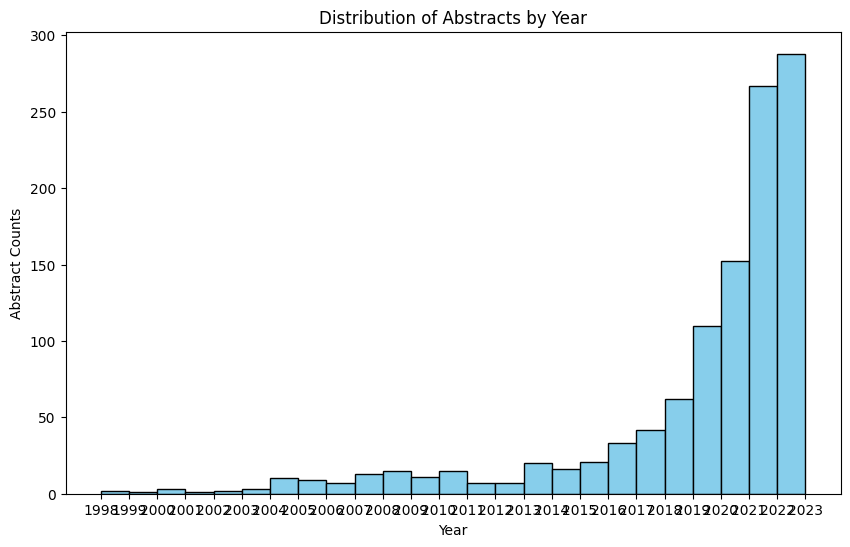

In [ ]:
#histogram of abstract counts by year
plt.figure(figsize=(10, 6))
plt.hist(New_Abstract['Year'], bins=range(New_Abstract['Year'].min(), New_Abstract['Year'].max()+1), color='skyblue', edgecolor='black') # Plot the histogram
plt.xlabel('Year')
plt.ylabel('Abstract Counts')
plt.title('Distribution of Abstracts by Year')
plt.xticks(range(New_Abstract['Year'].min(), New_Abstract['Year'].max()+1))
plt.show()


In [ ]:
pip install pyLDAvis --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import numpy as np
np.__version__ = '1.23.3'

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [ ]:
pip install --upgrade pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas.core.indexes import numeric

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 106.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
#R is 30 to see the top 30 words
#Check the left hand side of the intertopic map, Circle reps the each topic.
#When u hover,u will see each word that belongs to a topic and their frequency
pyLDAvis.gensim.prepare(ldamodel, corpus, id2word, R=30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.053790  0.027905       1        1  22.682296
6     -0.058951 -0.009718       2        1  15.787533
2      0.013680 -0.051176       3        1  15.154455
3     -0.048053 -0.067409       4        1   9.948970
5     -0.109003 -0.006277       5        1   9.664174
7     -0.036640 -0.081984       6        1   9.072496
9      0.043130 -0.015877       7        1   6.987986
4      0.129265 -0.031495       8        1   4.071179
0     -0.034438  0.195947       9        1   3.419792
8      0.154799  0.040084      10        1   3.211120, topic_info=            Term         Freq        Total Category  logprob  loglift
243         gene   308.000000   308.000000  Default  30.0000  30.0000
60      prostate  2410.000000  2410.000000  Default  29.0000  29.0000
177        model  1590.000000  1590.000000  Default  28.0000  28.0000
565   microarray   109.000000   109.000000  Default  27.0000  27.0000
119  pathologist   208.000000   208.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
589        apply    15.267876   334.014066  Topic10  -5.6652   0.3531
76      accuracy    16.678035   704.397827  Topic10  -5.5769  -0.3047
103    different    14.618806   481.349080  Topic10  -5.7087  -0.0557
35       however    14.093060   285.725963  Topic10  -5.7453   0.4292
246      include    13.889601   454.622795  Topic10  -5.7599  -0.0498

[781 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
6800      1  0.963038                 abc
5456      9  0.829604     abnormal_voxels
76        1  0.269734            accuracy
76        2  0.201591            accuracy
76        3  0.090858            accuracy
...     ...       ...                 ...
217      10  0.257810                wsis
4309      7  0.861883                zadc
3616      2  0.934845               zonal
3537      2  0.827987  zonal_segmentation
3537      3  0.110398  zonal_segmentation

[1910 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 4, 6, 8, 10, 5, 1, 9])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


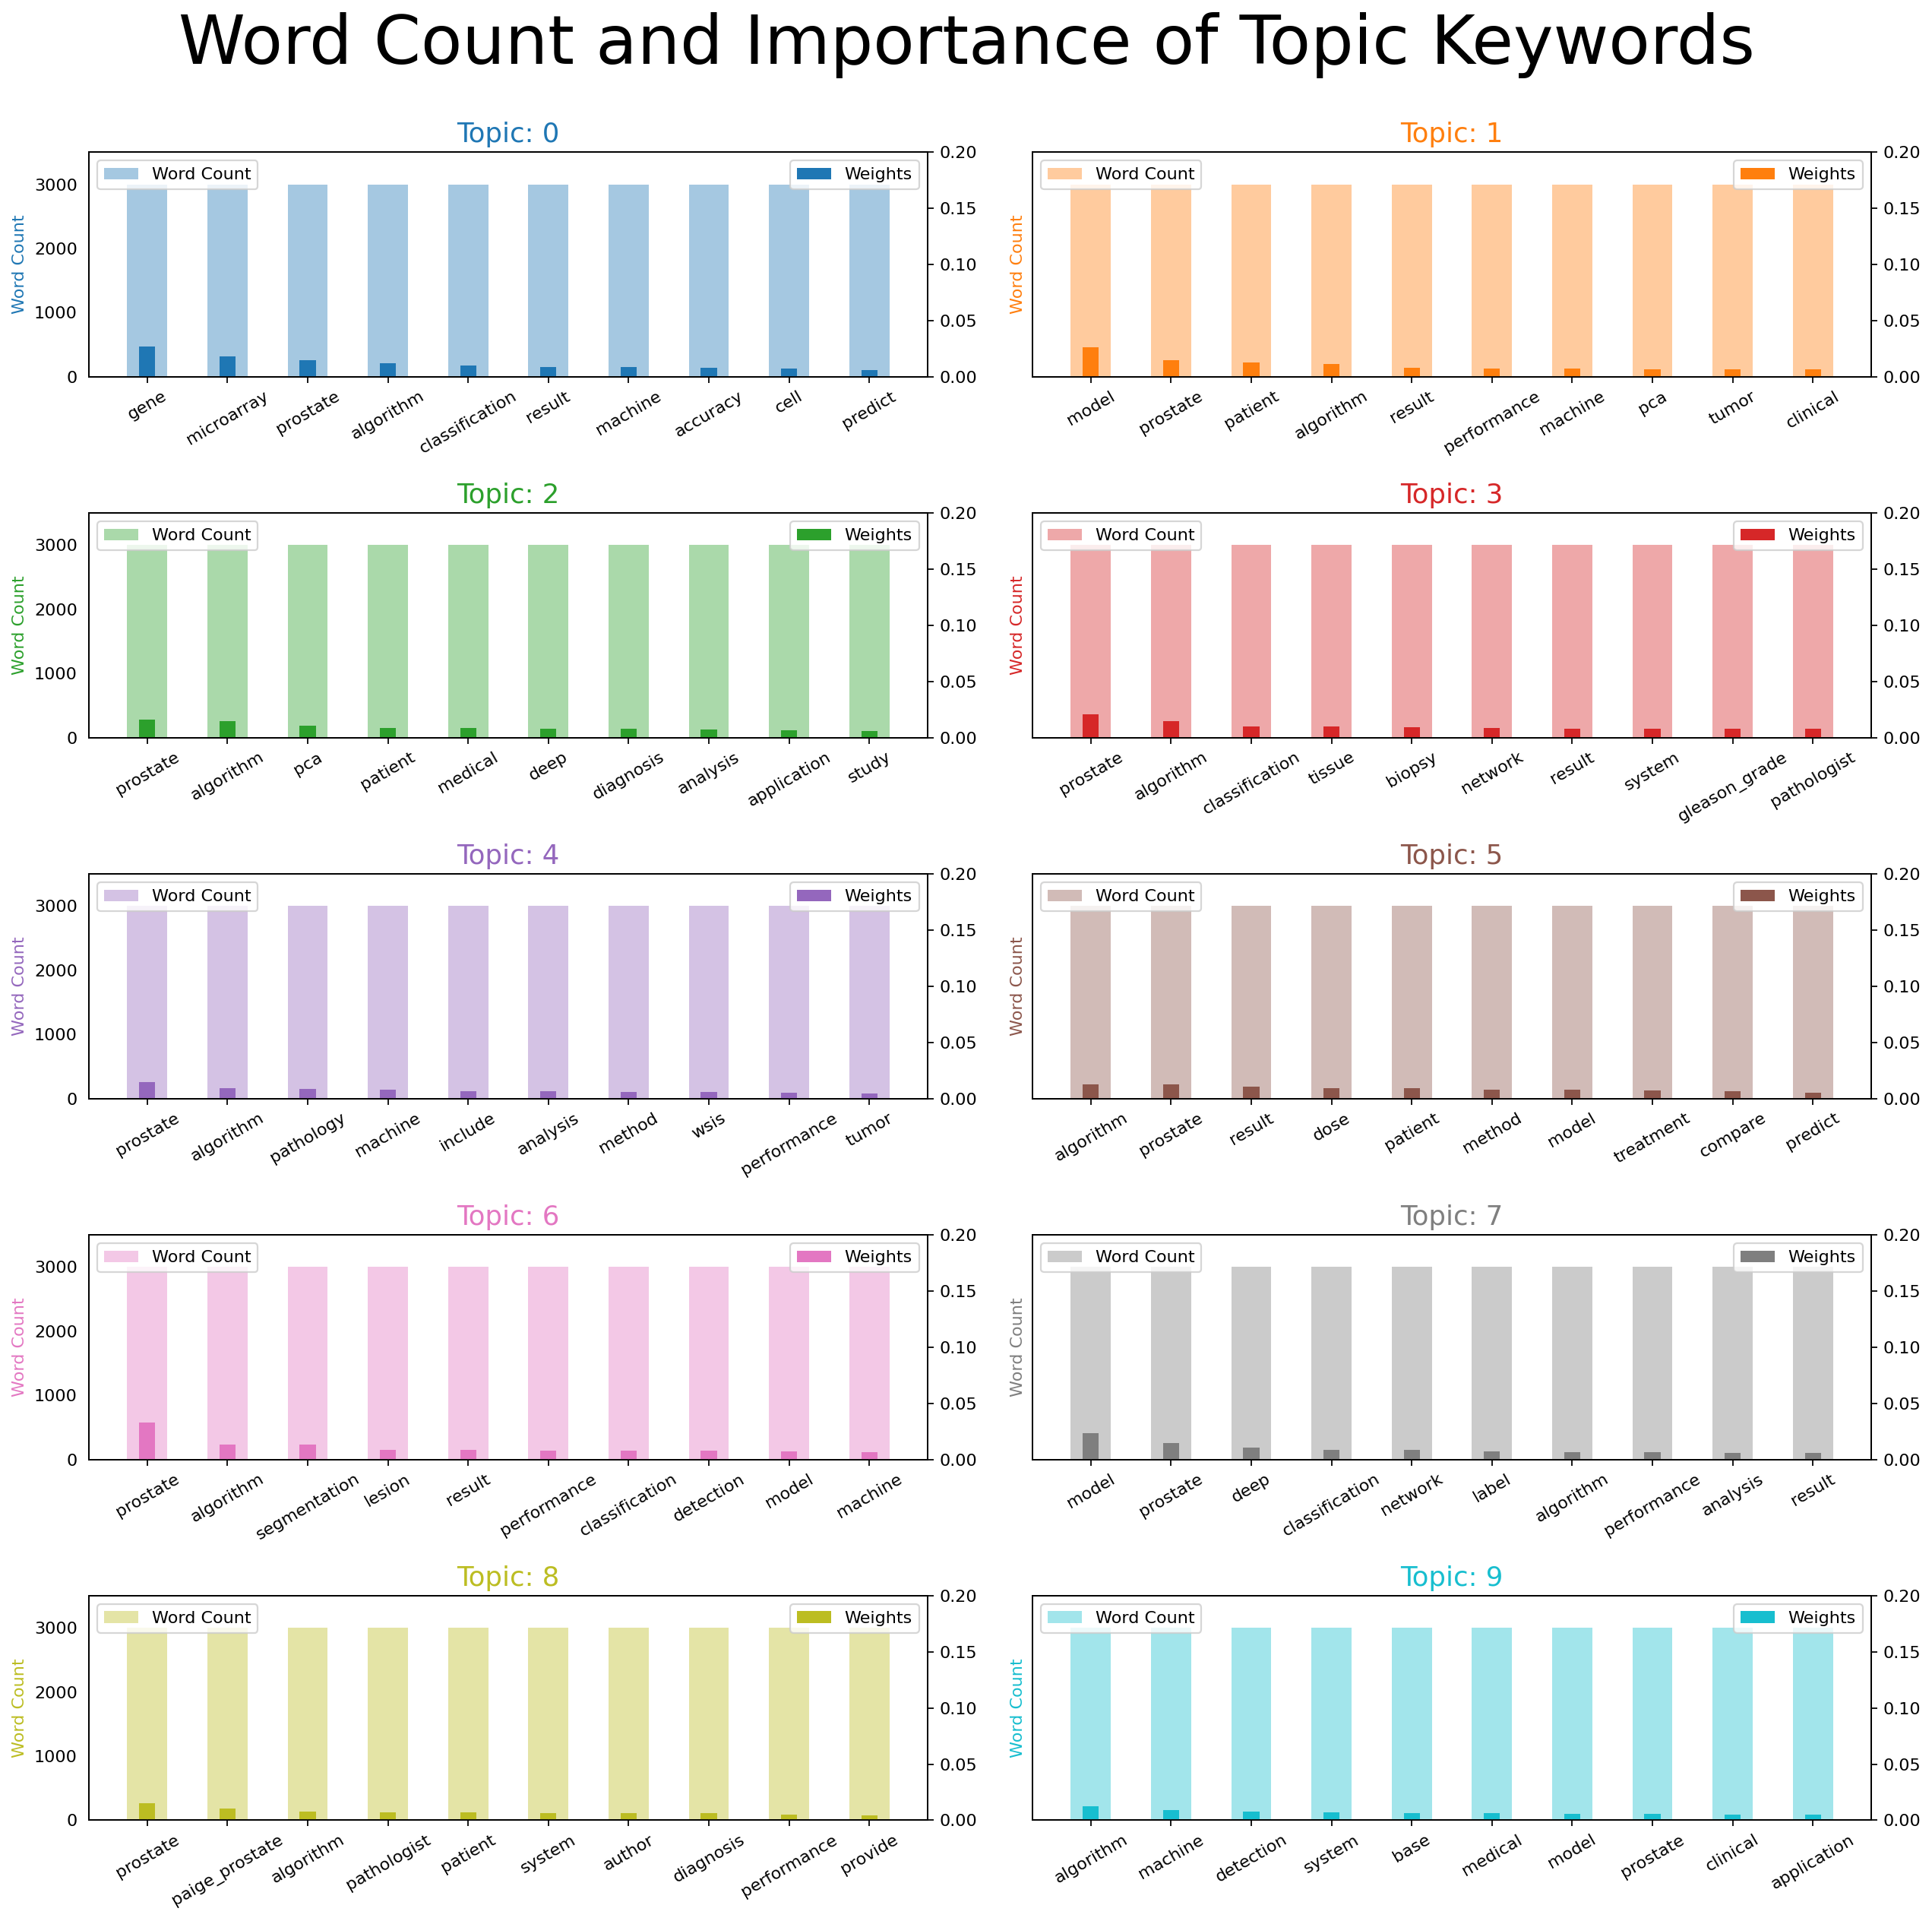

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
%matplotlib inline
topics = ldamodel.show_topics(formatted=False, num_topics = 10)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,15), sharey=True, dpi=160) #setting the number of topics visualised 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height=3000, data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.4, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.2); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'center')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=40, y=1.05)    
plt.show()

# Evaluation of Model

In [ ]:
#Cal perplexity and coherence score
import math

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
log_perplexity = ldamodel.log_perplexity(corpus)
print('Perplexity:', math.exp(log_perplexity))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: 0.0004551472233116071


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Coherence score with CV....the higher the score, the more coherent and understandable a topic can be to human.
LDA_Coherence_Model = CoherenceModel(model=ldamodel, texts=data_list, dictionary=id2word, coherence='c_v')
LDA_Coherence = LDA_Coherence_Model.get_coherence()
print('Coherence score:', LDA_Coherence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score: 0.3321670347980757


In [ ]:
#Coherence score using Umass...the closer the score is to ), the better the model.
LDA_Coherence_Model = CoherenceModel(model=ldamodel, texts=data_list, dictionary=id2word, coherence="u_mass")
LDA_Coherence = LDA_Coherence_Model.get_coherence()
print('Coherence score: ', LDA_Coherence)

Coherence score:  -1.6808636797331709


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# TOPIC MODELING WITH BERTopic

In [ ]:
!pip install --upgrade google-colab

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade bertopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 100.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  

In [ ]:
!pip install bertopic[visualization] --quiet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install bertopic[all]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade umap-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from copy import deepcopy
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Creating a new list object that contains all the values in lematized abstract column
docs = list(New_Abstract.loc[:, "Lemmatized_Abstract"].values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1117

In [ ]:
#returns the first 3 elements of the docs in the created lists.
docs[:3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['past year convolutional neural network proven powerful extract crucial medical registration however challenging application recent advance computer vision limit ability understand spatial correspondence core registration issue exaggerate come multimodal registration appearance input differ significantly present novel crossmodal attention mechanism correlate extract multimodal input map correlation registration transformation efficiently train developed network contrastive learningbased pretraining aid network extract highlevel input modality follow crossmodal attention validate transrectal ultrasound trus magnetic resonance mr registration clinically important procedure benefit prostate biopsy experimental result demonstrate mrtrus registration deep neural network embed crossmodal attention block outperforms advance cnnbased network time incorporated visualization technique interpretability network help insight deep base registration method source code httpsgithubcomdialrpiattentionr

In [ ]:
umap_model = UMAP(n_neighbors = 5, n_components = 5, min_dist = 0.05)
hdbscan_model = HDBSCAN(min_cluster_size = 40, min_samples = 30,
                        prediction_data = True, gen_min_span_tree = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#stopwords = list(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words("english")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Countvectorizer is used to remove stopwords from tdif
embedding_model = SentenceTransformer('all-MiniLM-L6-V2')
vectorizer_model = CountVectorizer(ngram_range = (1,3), stop_words = stopwords) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = BERTopic(language="english",
                 vectorizer_model = vectorizer_model,
                 hdbscan_model = hdbscan_model,
                 embedding_model = embedding_model,
                 umap_model = umap_model,
                 top_n_words = 10,
                 calculate_probabilities = True,
                 verbose = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Generate the topics...fit transforms..embeds them and predicts on them.
topics, probs = model.fit_transform(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Batches:   0%|          | 0/35 [00:00<?, ?it/s]

2023-05-02 16:00:38,280 - BERTopic - Transformed documents to Embeddings
2023-05-02 16:00:46,500 - BERTopic - Reduced dimensionality
2023-05-02 16:00:46,561 - BERTopic - Clustered reduced embeddings


In [ ]:
#-1 topic IDs are outliers, thise docs that couldnt be clustered
#Count are nos of documents in a topic
#Name...shows words that are best repsentatives of the topic...the top 4 words
freq_df = model.get_topic_info()
print("Number of topics: {}".format( len(freq_df)))
freq_df['Percentage'] = round(freq_df['Count']/freq_df['Count'].sum() * 100,2)
freq_df = freq_df.iloc[:,[0,1,2,3]]
freq_df.head()

Number of topics: 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Count,Name,Percentage
0,-1,382,-1_prostate_model_algorithm_ai,34.20
1,0,536,0_prostate_algorithm_model_patient,47.99
2,1,112,1_gleason_prostate_grade_algorithm,10.03
3,2,44,2_tissue_algorithm_prostate_stain,3.94
4,3,43,3_dose_treatment_plan_dose distribution,3.85


In [ ]:
#To see the top 10 most frequent words in the first topic generated
model.get_topic(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('prostate', 0.018656496068045522),
 ('algorithm', 0.015508817227898972),
 ('model', 0.014944198693500837),
 ('patient', 0.011520569107886116),
 ('result', 0.011047751087196758),
 ('classification', 0.010195004883147368),
 ('machine', 0.010032490824384845),
 ('gene', 0.009934345733877768),
 ('performance', 0.009198411278673107),
 ('method', 0.008967377187973224)]

In [ ]:
# a df to see our original abstracts with the topics they all belong to
df = pd.DataFrame({"topic" : topics, "documents" : docs})
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,documents
0,-1,past year convolutional neural network proven ...
1,1,develop artificial intelligencebased prostate ...
2,0,motivation molecular phenotyping gene expressi...
3,0,proceeding contain 40 topic discussed include ...
4,1,prostate biopsy histopathology immunohistochem...
...,...,...
1112,0,order effectively machine algorithm eg neural ...
1113,0,develop algorithm call q5 probabilistic classi...
1114,2,stereology stochastic geometry auxiliary tool ...
1115,0,pattern recognition analysis refers computer d...


In [ ]:
#To see the top 10 most frequent words in the second topics generated
model.get_topic(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('gleason', 0.02856177586966621),
 ('prostate', 0.02608640118084859),
 ('grade', 0.024705153732958958),
 ('algorithm', 0.017838100209682448),
 ('gleason grade', 0.016430831270118),
 ('deep', 0.01627908920847441),
 ('model', 0.015329510270461304),
 ('biopsy', 0.015283068182171325),
 ('diagnosis', 0.014597913547415905),
 ('network', 0.014318499072108856)]

In [ ]:
#To see the third topic generated
model.get_topic(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('tissue', 0.018933484909077376),
 ('algorithm', 0.01892690920590172),
 ('prostate', 0.01710882390283325),
 ('stain', 0.016880426999569983),
 ('quality', 0.013846897903865257),
 ('result', 0.013224448299861752),
 ('classification', 0.012814964688903512),
 ('gland', 0.01278996492737683),
 ('nucleus', 0.011641572984891721),
 ('wsis', 0.010728457844107519)]

In [ ]:
#Using Barchart to visualize the most important words from each topic
model.visualize_barchart(top_n_topics=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#To visualise topics clusters
model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Using Heatmap to see the correlation among the topics
model.visualize_heatmap()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model.visualize_hierarchy(top_n_topics=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
dictionary = Dictionary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
topic_words = [model.get_topic(topic)[0] for topic in topics]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
vectorizer = model.vectorizer_model
analyzer = vectorizer.build_analyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in model.get_topic(topic)] 
            for topic in range(len(set(topics))-1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Evaluation of Model Performance
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=docs,
    dictionary=dictionary,
    coherence='c_v')
coherence = coherence_model.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print('Coherence score:', coherence)

Coherence score: nan


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## TOPIC MODELING USING NMF MODEL

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
Scopus = (New_Abstract['Lemmatized_Abstract'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
tfidf_vectorizer = TfidfVectorizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(Scopus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
tfidf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
Scopus = tfidf.fit_transform(New_Abstract['Lemmatized_Abstract'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
Scopus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<1117x6989 sparse matrix of type '<class 'numpy.float64'>'
	with 105505 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Creation of NMF Model
nmf_model = NMF(n_components=10,random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Fitting the NMF model to dataset
nmf_model.fit(Scopus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NMF(n_components=10, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
vectorizer.fit(New_Abstract['Lemmatized_Abstract'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TfidfVectorizer()

In [ ]:
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text)]
    tokens = map(str.lower, tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
feature_names = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
tfidf.get_feature_names_out()[1500]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'bonferroni'

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f"THE TOP 10 WORDS FOR TOPIC # {index}")
    topics = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]]
    print (topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



THE TOP 10 WORDS FOR TOPIC # 0
['task', 'detection', 'application', 'digital', 'classification', 'field', 'machine', 'diagnosis', 'technique', 'analysis', 'neural', 'medical', 'deep', 'network', 'model']
THE TOP 10 WORDS FOR TOPIC # 1
['tumor', 'accuracy', 'dimensionality', 'method', 'sample', 'result', 'algorithm', 'select', 'subset', 'classifier', 'classification', 'selection', 'expression', 'microarray', 'gene']
THE TOP 10 WORDS FOR TOPIC # 2
['practice', 'provide', 'current', 'diagnostic', 'diagnosis', 'study', 'technology', 'application', 'care', 'pathology', 'clinical', 'urology', 'artificial', 'intelligence', 'ai']
THE TOP 10 WORDS FOR TOPIC # 3
['classification', 'pirads', 'prostate', 'magnetic', 'resonance', 'radiomic', 'detection', 'multiparametric', 'image', 'study', 'mri', 'radiomics', 'mpmri', 'lesion', 'pca']
THE TOP 10 WORDS FOR TOPIC # 4
['region', 'benign', 'score', 'classification', 'core', 'label', 'slide', 'diagnosis', 'pattern', 'prostate', 'tissue', 'pathologist',

In [ ]:
#To get the document-topic matrix
topic_results = nmf_model.transform(Scopus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(topic_results)

[[7.34212835e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.37341392e-02 0.00000000e+00 3.25085028e-02 ... 0.00000000e+00
  2.13034479e-03 0.00000000e+00]
 [0.00000000e+00 1.33739530e-01 1.65817503e-02 ... 4.57052454e-02
  0.00000000e+00 2.51422465e-02]
 ...
 [2.27471529e-02 3.07784923e-02 2.08541820e-03 ... 0.00000000e+00
  5.33478007e-03 4.75874209e-02]
 [7.70089016e-02 0.00000000e+00 5.30579855e-05 ... 2.85767010e-02
  0.00000000e+00 3.16107778e-02]
 [0.00000000e+00 1.90245497e-01 0.00000000e+00 ... 4.97861887e-03
  8.70431059e-03 3.70955730e-02]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
topic_results.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([0, 4, 1, ..., 4, 0, 1])

In [ ]:
New_Abstract['Topic'] = topic_results.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
topic_term_matrix = nmf_model.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(topic_term_matrix)

[[0.         0.00531938 0.         ... 0.01024548 0.         0.0004008 ]
 [0.         0.         0.0006808  ... 0.         0.         0.        ]
 [0.00018929 0.00038315 0.         ... 0.         0.         0.        ]
 ...
 [0.00340878 0.0063382  0.00324434 ... 0.         0.00729461 0.        ]
 [0.00045393 0.00018486 0.         ... 0.         0.         0.        ]
 [0.         0.0103039  0.         ... 0.         0.         0.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
mytopic_dict = {0:'PC Diagnosis',1:'PC Detection',2:'MRI for PC Detection ',3:'Image Analysis for PC Detection',4:'Algorithms for PC detection',5:'Deep Learning',6:'Prostate tumors',7:'PCA for PC prediction',8:'PC treatment',9:'ML for PC diagnosis'}
New_Abstract['Topic Label'] = New_Abstract['Topic'].map(mytopic_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
New_Abstract.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Authors,Author(s) ID,Title,Year,Source title,Abstract,Abstract_on_Lowercase,Abstract_without_Punct,Tokenized_Abstract,Abstract_without_Stopwords,Stemmed_Abstract,Lemmatized_Abstract,Topic,Topic_Labels,Topic Label
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...","in the past few years, convolutional neural ne...",in the past few years convolutional neural net...,"[in, the, past, few, years, convolutional, neu...","[past, years, convolutional, neural, networks,...",past year convolut neural network proven power...,past year convolutional neural network proven ...,0,Deep learning and neural network models for pr...,PC Diagnosis
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,purpose: developing an artificial intelligence...,purpose developing an artificial intelligenceb...,"[purpose, developing, an, artificial, intellig...","[developing, artificial, intelligencebased, pr...",develop artifici intelligencebas prostat detec...,develop artificial intelligencebased prostate ...,4,Prostate cancer tissue classification and grad...,Algorithms for PC detection
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,motivation: molecular phenotyping by gene expr...,motivation molecular phenotyping by gene expre...,"[motivation, molecular, phenotyping, by, gene,...","[motivation, molecular, phenotyping, gene, exp...",motiv molecular phenotyp gene express profil c...,motivation molecular phenotyping gene expressi...,1,Machine learning algorithms for prostate cance...,PC Detection
19,[No author name available],[No author id available],ICBET 2022 - Proceedings of 2022 12th Internat...,2022,ACM International Conference Proceeding Series,The proceedings contain 40 papers. The topics ...,the proceedings contain 40 papers. the topics ...,the proceedings contain 40 papers the topics d...,"[the, proceedings, contain, 40, papers, the, t...","[proceedings, contain, 40, topics, discussed, ...",proceed contain 40 topic discuss includ perfor...,proceeding contain 40 topic discussed include ...,9,Segmentation and detection of prostate cancer ...,ML for PC diagnosis
20,"Qiu Y., Hu Y., Kong P., Xie H., Zhang X., Cao ...",57224198946;57212027093;57204185708;5719376180...,Automatic Prostate Gleason Grading Using Pyram...,2022,Frontiers in Oncology,Purpose: Prostate biopsy histopathology and im...,purpose: prostate biopsy histopathology and im...,purpose prostate biopsy histopathology and imm...,"[purpose, prostate, biopsy, histopathology, an...","[prostate, biopsy, histopathology, immunohisto...",prostat biopsi histopatholog immunohistochemis...,prostate biopsy histopathology immunohistochem...,4,Prostate cancer tissue classification and grad...,Algorithms for PC detection
